In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('FoodCost_test.csv',sep='\t' )
df


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


# EDA for Test Data

In [3]:
df.shape #checking the rows and ccolumns count

(4231, 8)

In [4]:
df.columns #checking various columns 

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [5]:
df.dtypes  # checking the data types of columns 

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [6]:
df.isnull().sum() # checking for null values 

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

<AxesSubplot:>

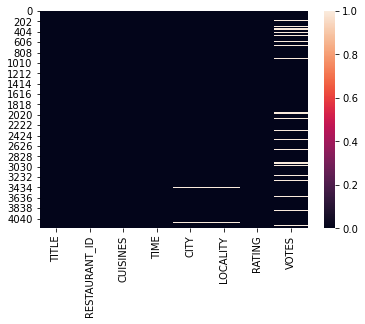

In [7]:
sns.heatmap(df.isnull())

There are null values in column CITY,LOCALITY,RATING,VOTES

Key Obseravtions till here
1. Data is not numerical. 
2. nominal values are alphanumeric also.
So, One by one we will try to extract the relevant values from each variable.

In [8]:
df.head(2)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes


In [9]:

for i in df.columns:
    print("Count of unique values of  ", i, "is " , df[i].nunique())

Count of unique values of   TITLE is  86
Count of unique values of   RESTAURANT_ID is  4127
Count of unique values of   CUISINES is  1727
Count of unique values of   TIME is  1183
Count of unique values of   CITY is  151
Count of unique values of   LOCALITY is  834
Count of unique values of   RATING is  31
Count of unique values of   VOTES is  1136


In [10]:
df.TITLE.value_counts()

QUICK BITES                   1416
CASUAL DINING                 1258
None                           284
CAFÉ                           223
DESSERT PARLOR                 126
                              ... 
FINE DINING,CAFÉ                 1
SWEET SHOP,DESSERT PARLOR        1
PUB,CAFÉ                         1
COCKTAIL BAR,CASUAL DINING       1
PAAN SHOP                        1
Name: TITLE, Length: 86, dtype: int64

# TITLE
1. we will find how many comma sepearted values i.e 2 
2. we will make 2 titles sepeartely 
3. will replace null values with NONE

In [11]:
# Analysing Titles 
titles = list(df['TITLE'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         

        
print("Maximum Titles in a Cell : ", maxim)    

Maximum Titles in a Cell :  2


In [12]:
df.TITLE.fillna('NONE,NONE',inplace=True)

df['TITLE1'] = df['TITLE'].str.split(",").str[0]
df['TITLE2'] = df['TITLE'].str.split(",").str[1]
df.TITLE2.fillna('NONE',inplace=True)

#dropping  the TITLE variable after splitting it in TITLE1 and TITLE2
df.drop('TITLE',axis=1,inplace=True)

# CITY
1. we will remove extra spaces in string.
2. we will remove any special character in string , if any

In [13]:
df["CITY"].value_counts()

Bangalore                      686
Chennai                        681
Hyderabad                      639
Mumbai                         589
Kochi                          472
                              ... 
Balavinayagar Nagar Chennai      1
Miumbai                          1
Community Centre                 1
India Gate New Delhi             1
Mira Road Thane Mumbai           1
Name: CITY, Length: 151, dtype: int64

In [14]:
# remove the extra spaces , save only string to  the city
import re
df['CITY'] = df['CITY'].apply(lambda x: re.sub(r"[^a-zA-Z]+", ' ', str(x)))

# LOCALITY
1. remove extra spaces from string.
2. remove special characters from string.
3. Will replace with 'UNKNOWN' if string has numerical value

In [15]:
df["LOCALITY"].value_counts()

Kukatpally               54
Kakkanad                 54
Whitefield               53
Madhapur                 52
Gachibowli               50
                         ..
international Airport     1
Infantry Road             1
Sector 32                 1
Near Kodihalli Masjid     1
Sector 45                 1
Name: LOCALITY, Length: 834, dtype: int64

In [16]:
# remove the extra spaces and special characters from locality
import re
df['LOCALITY'] = df['LOCALITY'].apply(lambda x: re.sub(r"\W+|_", " ", str(x)))
df['LOCALITY'] = df['LOCALITY'].apply(lambda x: re.sub(' +','',str(x)))

In [17]:
for i in df["LOCALITY"]:
    for j in i:
        if j.isdigit():
            j='UNKNOWN'

In [18]:
localities = list(df['LOCALITY'])

for i in range(len(localities)):
    if localities[i].isdigit():
        localities[i] = 'UNKNOWN'
    else:
        localities[i] = localities[i].strip().upper()   

# RATING
1. It has 3 irrelevant entries. we will explicitly remove them
2. will replace null values with 0

In [19]:
df.RATING.unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2', nan], dtype=object)

In [20]:
# replacing the improper data
df['RATING'] = df['RATING'].str.replace('-','0')
df['RATING'] = df['RATING'].str.replace('NEW','0')
df['RATING'] = df['RATING'].str.replace('nan','0')

In [21]:
df['RATING'].fillna('0',inplace=True) # filling the null values 

In [22]:
df.isnull().sum()

RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY               0
LOCALITY           0
RATING             0
VOTES            402
TITLE1             0
TITLE2             0
dtype: int64

# VOTES
1. We will replace null values with 0
2. we will extract votes from VOTES columns

In [23]:
#Extracting VOTES  from VOTES column and convert to Numeric.
df['VOTES'].fillna('0',inplace=True) # filling the null values 

df['VOTES'] = df['VOTES'].str.split().str[0]
df['VOTES'] = df['VOTES'].astype(int)


In [24]:
df.head(2)

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2
0,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector18,4.3,564,CASUAL DINING,NONE
1,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,GrantRoad,4.2,61,QUICK BITES,NONE


# CUISINES
1. we will find the count of unique CUISINES . they are 8
2. we will make 8 sepearte columns for each cuisines by splitting CUISINES
3. we will replace null values in all 8 cuisines with NONE
4. we will drop old CUISINES column and CUISINES_count column


In [25]:
df['CUISINES_count'] = df['CUISINES'].apply(lambda x: len(x.split(",")))

df['CUISINES_count'].value_counts()

2    1346
1     985
3     983
4     561
5     219
6      63
7      43
8      31
Name: CUISINES_count, dtype: int64

In [26]:
df['CUISINES'].unique()

array(['North Indian, Chinese, Mughlai, Kebab',
       'South Indian, Fast Food, Pizza, North Indian',
       'North Indian, Seafood, Biryani, Chinese', ...,
       'North Indian, Chinese, Kebab, Juices', 'Sindhi, Street Food',
       'Rolls, Beverages'], dtype=object)

In [27]:
df['CUISINE1'] = df['CUISINES'].str.split(",").str[0]
df['CUISINE2'] = df['CUISINES'].str.split(",").str[1]
df['CUISINE3'] = df['CUISINES'].str.split(",").str[2]
df['CUISINE4'] = df['CUISINES'].str.split(",").str[3]
df['CUISINE5'] = df['CUISINES'].str.split(",").str[4]
df['CUISINE6'] = df['CUISINES'].str.split(",").str[5]
df['CUISINE7'] = df['CUISINES'].str.split(",").str[6]
df['CUISINE8'] = df['CUISINES'].str.split(",").str[7]
#dropping  the CUISINE AND ITS CUISINES_count variable after splitting it in 8 SPLITS OF A CELL
df.drop(['CUISINES','CUISINES_count'],axis=1,inplace=True)

In [28]:
df.CUISINE1.fillna('None',inplace=True)
df.CUISINE2.fillna('None',inplace=True)
df.CUISINE3.fillna('None',inplace=True)
df.CUISINE4.fillna('None',inplace=True)
df.CUISINE5.fillna('None',inplace=True)
df.CUISINE6.fillna('None',inplace=True)
df.CUISINE7.fillna('None',inplace=True)
df.CUISINE8.fillna('None',inplace=True)

In [29]:
df.isnull().sum()

RESTAURANT_ID    0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
TITLE1           0
TITLE2           0
CUISINE1         0
CUISINE2         0
CUISINE3         0
CUISINE4         0
CUISINE5         0
CUISINE6         0
CUISINE7         0
CUISINE8         0
dtype: int64

In [30]:
#dropping  the time variable 
df.drop('TIME',axis=1,inplace=True)

In [31]:
df.head(2)

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,4085,Noida,Sector18,4.3,564,CASUAL DINING,NONE,North Indian,Chinese,Mughlai,Kebab,None,None,None,None
1,12680,Mumbai,GrantRoad,4.2,61,QUICK BITES,NONE,South Indian,Fast Food,Pizza,North Indian,None,None,None,None


# Univariate and Bivariate Analysis

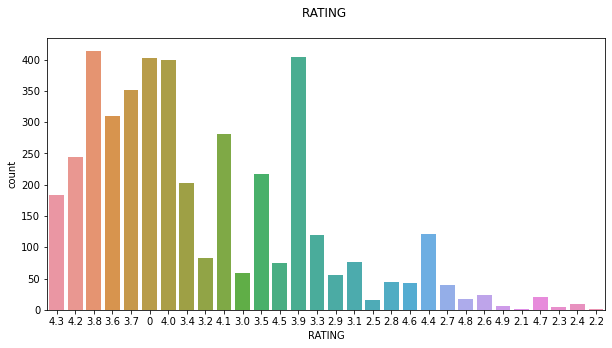

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(df["RATING"])
plt.title("RATING \n ")
plt.show() 

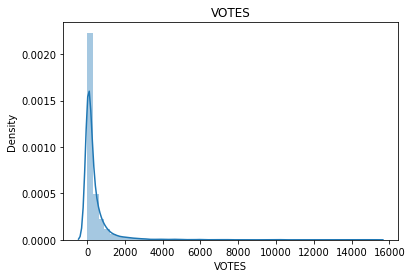

In [33]:
plt.title("VOTES")
sns.distplot(df["VOTES"])
plt.show() 

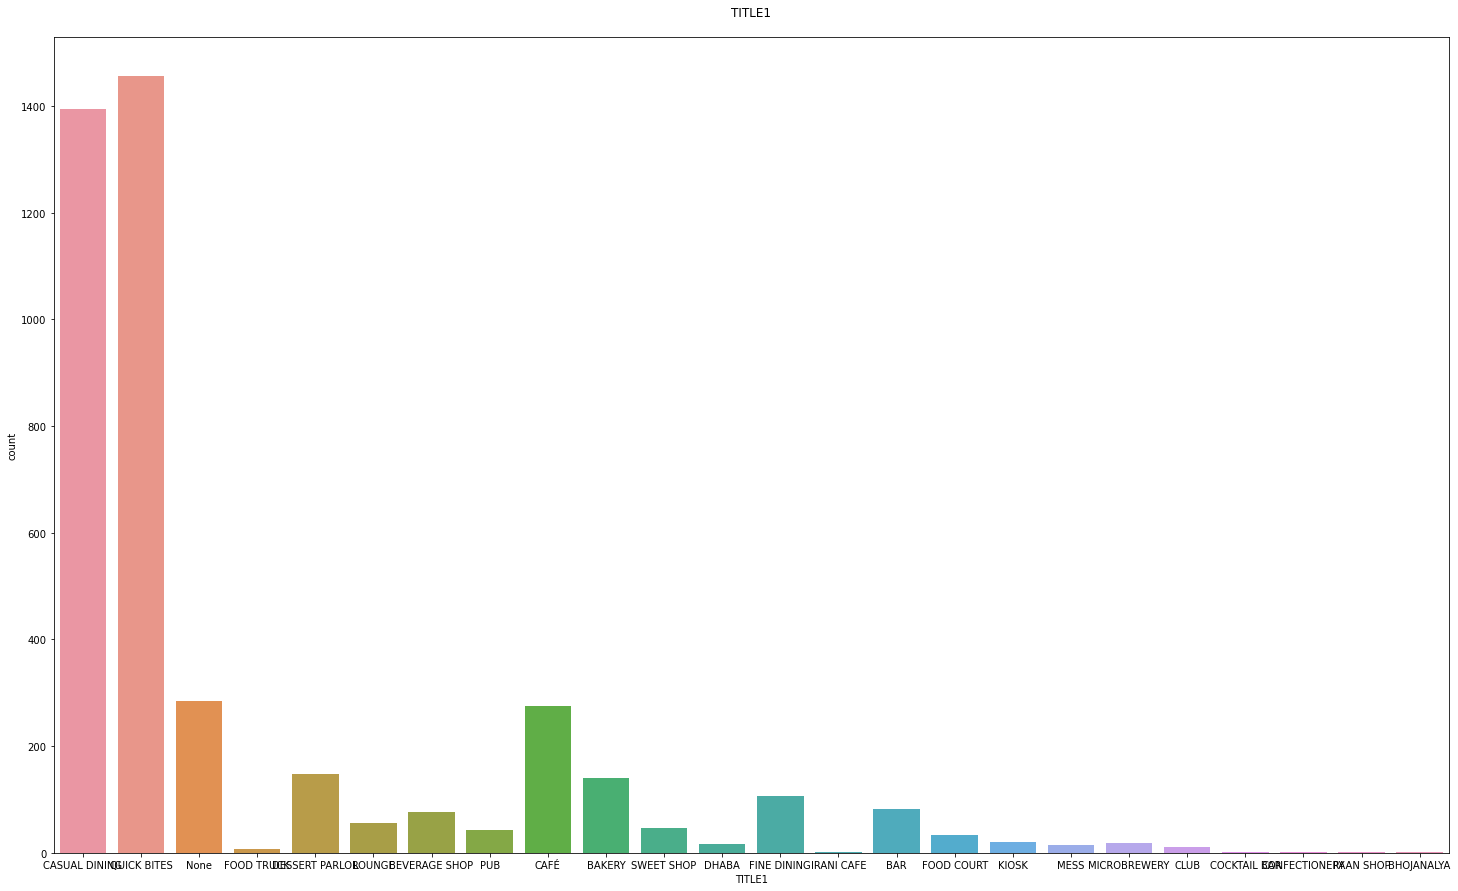

In [34]:
plt.figure(figsize=(25,15))
sns.countplot(df["TITLE1"])
plt.title("TITLE1\n")
plt.show() # shows max data concentrated in chick bites and casual dining 

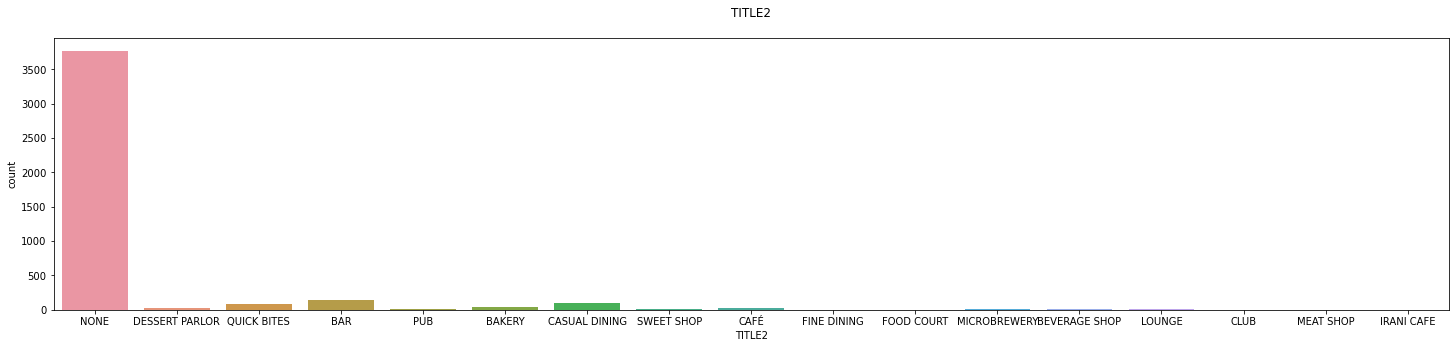

In [35]:
plt.figure(figsize=(25,5))
plt.title("TITLE2\n")
sns.countplot(df["TITLE2"])
plt.show() # shows max data is not available for TITLE2 and then quick bites and bar has max concentration

# Handling the outliers

1. Only Votes is numeric types . which can be very high and very low also 
2. So, NO removal of outliers

# Changing the nominal values  to numerical

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
df.head(2)

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,4085,Noida,Sector18,4.3,564,CASUAL DINING,NONE,North Indian,Chinese,Mughlai,Kebab,None,None,None,None
1,12680,Mumbai,GrantRoad,4.2,61,QUICK BITES,NONE,South Indian,Fast Food,Pizza,North Indian,None,None,None,None


In [38]:
list1=['CITY','LOCALITY','TITLE1','TITLE2','CUISINE1','CUISINE2','CUISINE3','CUISINE4','CUISINE5','CUISINE6','CUISINE7','CUISINE8']
for i in list1:
    df[i]=le.fit_transform(df[i])
df.head(5)

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,4085,96,656,4.3,564,5,13,60,19,56,33,57,42,34,7
1,12680,83,219,4.2,61,22,13,73,24,61,49,57,42,34,7
2,1411,83,406,3.8,350,5,13,60,69,13,15,57,42,34,7
3,204,35,450,3.8,1445,19,13,12,81,80,68,57,42,34,7
4,13453,66,296,3.6,23,22,13,73,42,80,68,57,42,34,7


In [39]:
# scaling the dataset

In [40]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
scaled_df=sc.fit_transform(df)
scaled_df.shape

(4231, 15)

# All EDA and preprocessing has been done on test dataset. After data modelling done on Train dataset we will use this test dataset for prediction in the end ,at the time of conclusion

# EDA for train dataset

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
ds=pd.read_csv("FoodCost_train.csv",sep='\t')
ds

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [43]:
ds.dtypes # checking the data types of columns 

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [44]:
ds.columns #checking various columns 

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [45]:
ds.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


key observations here

1. mean and median is very near .
2. There is huge differnece in 75% and max values means few outliers are there
3. Count is same as no. of rows.  means no missing values in this column 

In [46]:
ds.shape  #checking the rows and ccolumns count

(12690, 9)

In [47]:
ds.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

<AxesSubplot:>

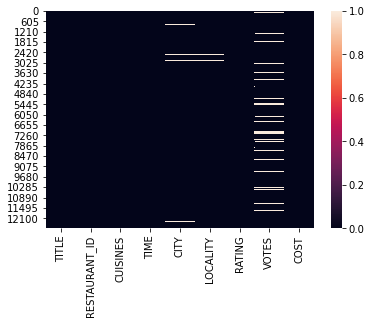

In [48]:
sns.heatmap(ds.isnull()) # checking the null values 

There are null values in column CITY,LOCALITY,RATING,VOTES

In [49]:
dscor=ds.corr() # checking the correlation
dscor # only one numerical column . so no correlation

,RESTAURANT_ID,COST
RESTAURANT_ID,1.00000,0.04071
COST,0.04071,1.00000


Key Obseravtions till here
1. Data is not numerical. 
2. nominal values are alphanumeric also.
So, One by one we will try to extract the relevant values from each variable.

# TITLE
1. we will find how many comma sepearted values i.e 2 
2. we will make 2 titles sepeartely 
3. will replace null values with NONE

In [50]:
ds.TITLE.value_counts()

QUICK BITES                    4218
CASUAL DINING                  3652
None                           1003
CAFÉ                            607
DESSERT PARLOR                  382
                               ... 
LOUNGE,FINE DINING                1
SWEET SHOP,BEVERAGE SHOP          1
BEVERAGE SHOP,CASUAL DINING       1
DESSERT PARLOR,KIOSK              1
BAR,CLUB                          1
Name: TITLE, Length: 113, dtype: int64

In [51]:
titles = list(ds['TITLE'])
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         

        
print("Maximum Titles in a Cell : ", maxim)    

Maximum Titles in a Cell :  2


In [52]:
ds.TITLE.fillna('NONE,NONE',inplace=True)

ds['TITLE1'] = ds['TITLE'].str.split(",").str[0]
ds['TITLE2'] = ds['TITLE'].str.split(",").str[1]
ds.TITLE2.fillna('NONE',inplace=True)

#dropping  the TITLE variable after splitting it in TITLE1 and TITLE2
ds.drop('TITLE',axis=1,inplace=True)

# CITY
1. we will remove extra spaces in string.
2. we will remove any special character in string , if any

In [53]:
ds["CITY"].value_counts()

Chennai                                                           2174
Bangalore                                                         2149
Hyderabad                                                         1819
Mumbai                                                            1722
New Delhi                                                         1321
                                                                  ... 
Navallur                                                             1
SG Palya                                                             1
Amrit kaur market opposite new delhi railway station paharganj       1
Vasai west                                                           1
Dist. Center New Delhi                                               1
Name: CITY, Length: 359, dtype: int64

In [54]:
# remove the extra spaces , save only string to  the city
import re
#for i in ds["CITY"] :
#ds['CITY'] = ds['CITY'].apply(lambda x: re.sub(r"\W+|_0-9", " ", str(x)))
ds['CITY'] = ds['CITY'].apply(lambda x: re.sub(r"[^a-zA-Z]+", ' ', str(x)))

In [55]:
ds["CITY"].value_counts()

Chennai                2174
Bangalore              2149
Hyderabad              1819
Mumbai                 1722
New Delhi              1321
                       ... 
Palavakkam                1
Sector Noida              1
Chennai Padur             1
Maharashtra               1
Jogeshwari w Mumbai       1
Name: CITY, Length: 328, dtype: int64

# LOCALITY
1. remove extra spaces from string.
2. remove special characters from string.
3. Will replace with 'UNKNOWN' if string has numerical value

In [56]:
ds["LOCALITY"].value_counts().index

Index(['Gachibowli', 'Indiranagar', 'Edappally', 'Kakkanad', 'HSR',
       'Kukatpally', 'Madhapur', 'Marathahalli', 'Banjara Hills',
       'Jubilee Hills',
       ...
       'Goregaon', 'Opposite ATC Shoping Mall As Rao Nagar', 'Suraj Kund',
       'Mahadevapura', 'H Block', 'Kathrikadavu',
       'THE ODYSSEY RESTAURANT AND GRILL / ASHOK T GNANAMUTHU SITE NO-11 SHOP NO-3 GROUND FLOOR KHATA NO-690/60/11 NEW NO-393 BHATTARAHALLI VILLAGE BIDARAHALLI HOBLI BANGALORE- 560049',
       'Near Begum Bazaar',
       'Near Laxmi Industrial Estate off Andheri Link Road',
       'Shop 5 Plot 2 Village Sahberi Crossing Republik'],
      dtype='object', length=1416)

In [57]:
# remove the extra spaces and special characters from locality
import re
ds['LOCALITY'] = ds['LOCALITY'].apply(lambda x: re.sub(r"\W+|_", " ", str(x)))
ds['LOCALITY'] = ds['LOCALITY'].apply(lambda x: re.sub(' +','',str(x)))

In [58]:
for i in ds["LOCALITY"]:
    for j in i:
        if j.isdigit():
            j='UNKNOWN'

In [59]:
localities = list(ds['LOCALITY'])

for i in range(len(localities)):
    if localities[i].isdigit():
        localities[i] = 'UNKNOWN'
    else:
        localities[i] = localities[i].strip().upper()   

# RATING
1. It has 3 irrelevant entries. we will explicitly remove them
2. will replace null values with 0

In [60]:
ds.RATING.unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [61]:
# replacing the improper data
ds['RATING'] = ds['RATING'].str.replace('-','0')
ds['RATING'] = ds['RATING'].str.replace('NEW','0')

In [62]:
ds['RATING'].fillna('0',inplace=True) # filling the null values 

In [63]:
ds.isnull().sum()

RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES            1204
COST                0
TITLE1              0
TITLE2              0
dtype: int64

# VOTES
1. We will replace null values with 0
2. we will extract votes from VOTES columns

In [64]:
#Extracting VOTES  from VOTES column and convert to Numeric.
ds['VOTES'].fillna('0',inplace=True) # filling the null values 
# Experience
ds['VOTES'] = ds['VOTES'].str.split().str[0]
ds['VOTES'] = ds['VOTES'].astype(int)


In [65]:
ds.head(2)

,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2
0,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,DombivaliEast,3.6,49,1200,CASUAL DINING,NONE
1,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR


# CUISINES
1. we will find the count of unique CUISINES . they are 8
2. we will make 8 sepearte columns for each cuisines by splitting CUISINES
3. we will replace null values in all 8 cuisines with NONE
4. we will drop old CUISINES column and CUISINES_count column


In [66]:
ds['CUISINES_count'] = ds['CUISINES'].apply(lambda x: len(x.split(",")))

ds['CUISINES_count'].value_counts()

2    3937
1    3062
3    2996
4    1680
5     601
6     238
7      99
8      77
Name: CUISINES_count, dtype: int64

In [67]:
ds['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [68]:

ds['CUISINE1'] = ds['CUISINES'].str.split(",").str[0]
ds['CUISINE2'] = ds['CUISINES'].str.split(",").str[1]
ds['CUISINE3'] = ds['CUISINES'].str.split(",").str[2]
ds['CUISINE4'] = ds['CUISINES'].str.split(",").str[3]
ds['CUISINE5'] = ds['CUISINES'].str.split(",").str[4]
ds['CUISINE6'] = ds['CUISINES'].str.split(",").str[5]
ds['CUISINE7'] = ds['CUISINES'].str.split(",").str[6]
ds['CUISINE8'] = ds['CUISINES'].str.split(",").str[7]
#dropping  the CUISINE AND ITS CUISINES_count variable after splitting it in 8 SPLITS OF A CELL
ds.drop(['CUISINES','CUISINES_count'],axis=1,inplace=True)

In [69]:
ds.CUISINE1.fillna('None',inplace=True)
ds.CUISINE2.fillna('None',inplace=True)
ds.CUISINE3.fillna('None',inplace=True)
ds.CUISINE4.fillna('None',inplace=True)
ds.CUISINE5.fillna('None',inplace=True)
ds.CUISINE6.fillna('None',inplace=True)
ds.CUISINE7.fillna('None',inplace=True)
ds.CUISINE8.fillna('None',inplace=True)

In [70]:
ds.isnull().sum()

RESTAURANT_ID    0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
TITLE1           0
TITLE2           0
CUISINE1         0
CUISINE2         0
CUISINE3         0
CUISINE4         0
CUISINE5         0
CUISINE6         0
CUISINE7         0
CUISINE8         0
dtype: int64

In [71]:
#dropping  the time variable 
ds.drop('TIME',axis=1,inplace=True)

In [72]:
ds.head(5)

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,9438,Thane,DombivaliEast,3.6,49,1200,CASUAL DINING,NONE,Malwani,Goan,North Indian,None,None,None,None,None
1,13198,Chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,None,None,None,None
2,10915,Chennai,Saligramam,3.8,221,800,CASUAL DINING,NONE,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None
3,6346,Mumbai,BandraWest,4.1,24,800,QUICK BITES,NONE,Tibetan,Chinese,None,None,None,None,None,None
4,15387,Mumbai,LowerParel,3.8,165,300,DESSERT PARLOR,NONE,Desserts,None,None,None,None,None,None,None


# Univariate and Bivariate Analysis

In [73]:
#univariate analysis

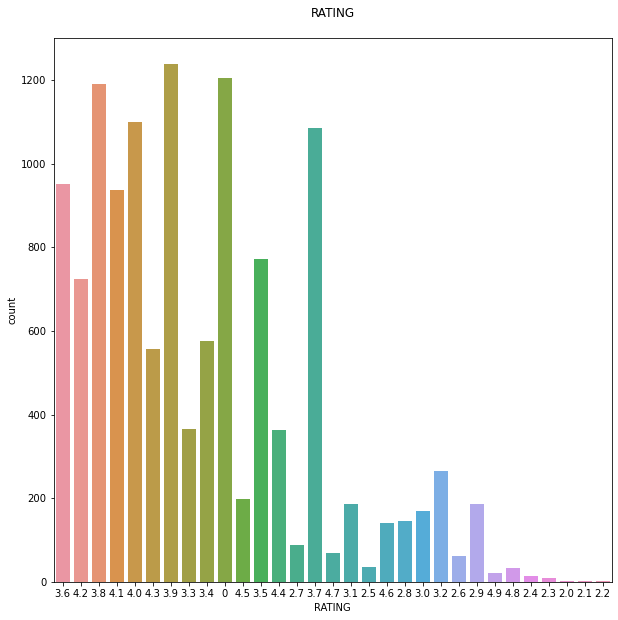

In [74]:
plt.figure(figsize=(10,10))
sns.countplot(ds["RATING"])
plt.title("RATING\n ")
plt.show() 

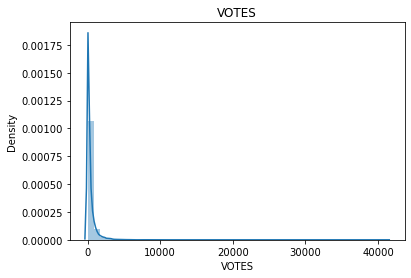

In [75]:
plt.title("VOTES")
sns.distplot(ds["VOTES"])
plt.show() # shows very less are BDS Qualified

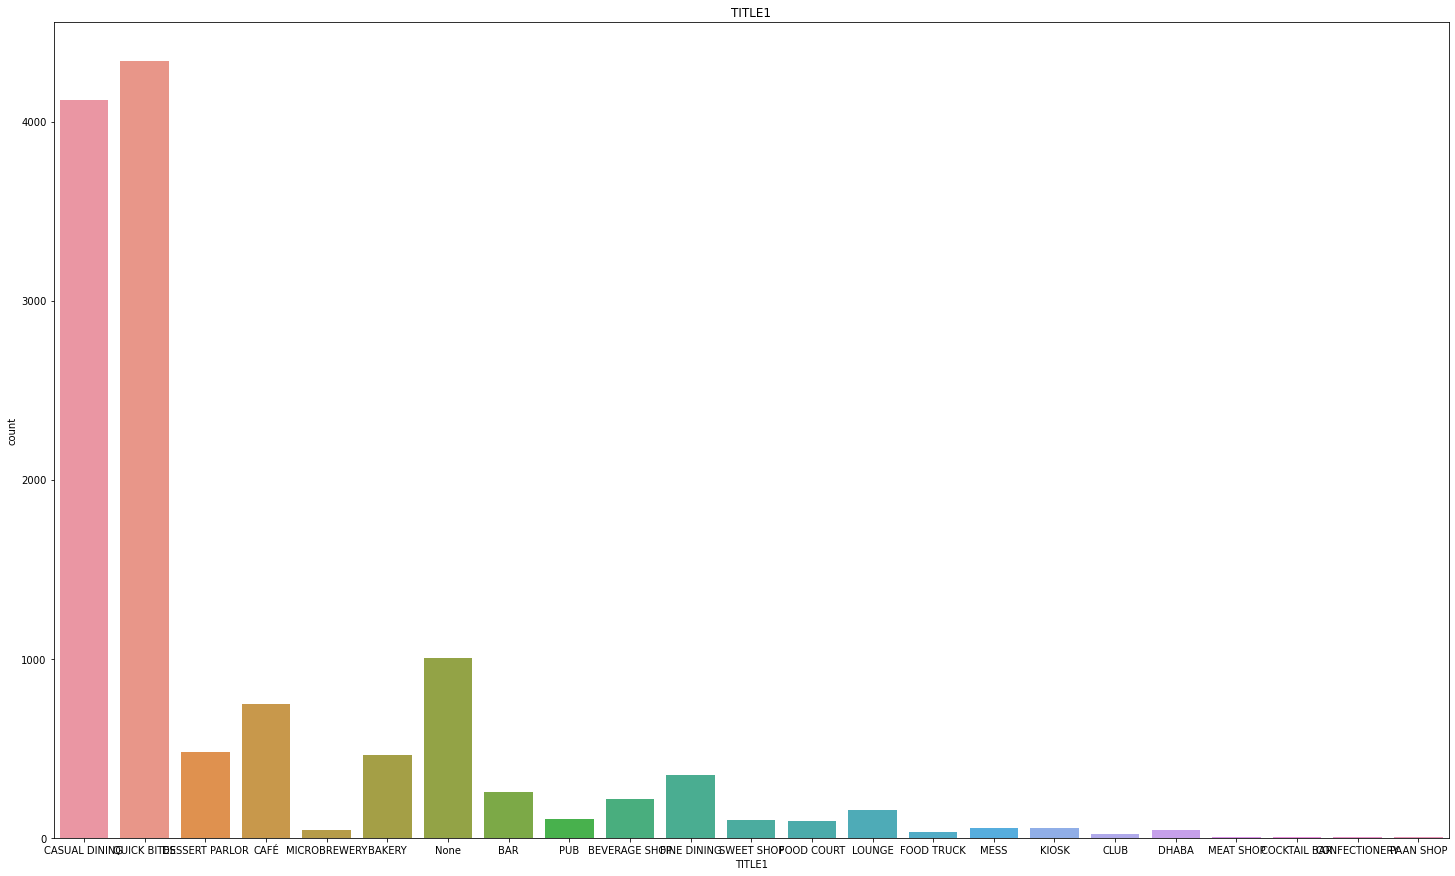

In [76]:
plt.figure(figsize=(25,15))
plt.title("TITLE1")
sns.countplot(ds["TITLE1"])
plt.show() # shows max data concentrated in chick bites and casual dining 

In [77]:
ds.head(1)

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,9438,Thane,DombivaliEast,3.6,49,1200,CASUAL DINING,NONE,Malwani,Goan,North Indian,None,None,None,None,None


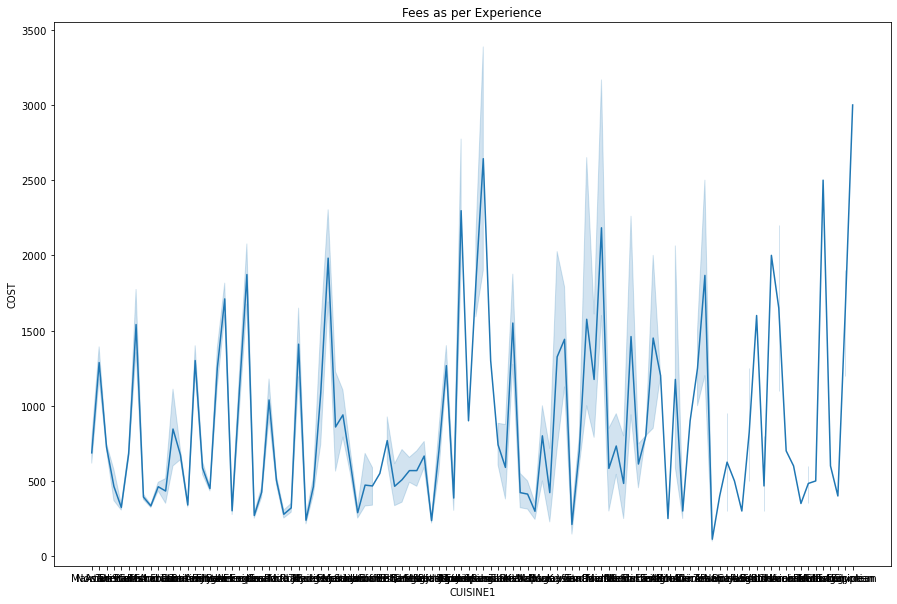

In [78]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x='CUISINE1',y='COST',data=ds)
ax.set_title("Fees as per Experience")
plt.show()

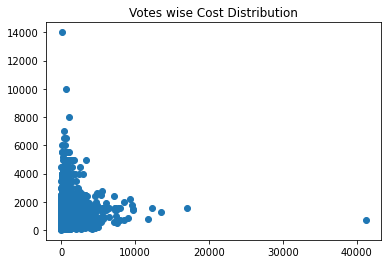

In [79]:
#plt.figure(figsize=(10,5))
plt.title('Votes wise Cost Distribution')
plt.scatter(ds['VOTES'],ds['COST'])
plt.show()

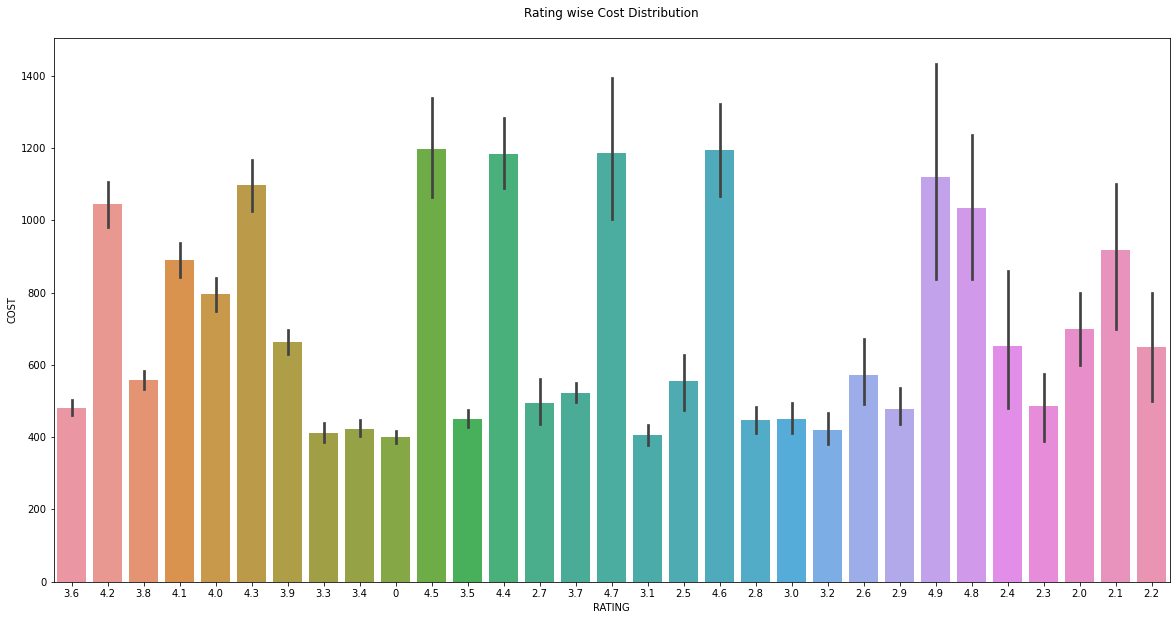

In [80]:
plt.figure(figsize=(20,10))
plt.title('Rating wise Cost Distribution\n')
sns.barplot(ds['RATING'],ds['COST'])
plt.show() # shows the fees is max when the rating is near 48%

# Changing the nominal values  to numerical

In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [82]:
list1=['CITY','LOCALITY','TITLE1','TITLE2','CUISINE1','CUISINE2','CUISINE3','CUISINE4','CUISINE5','CUISINE6','CUISINE7','CUISINE8']
for i in list1:
    ds[i]=le.fit_transform(ds[i])
ds.head(5)

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8
0,9438,288,282,3.6,49,1200,4,15,59,32,66,85,78,69,47,19
1,13198,62,1037,4.2,30,1500,4,1,6,60,41,85,78,69,47,19
2,10915,62,1092,3.8,221,800,4,15,72,23,12,32,78,69,47,19
3,6346,201,134,4.1,24,800,21,15,100,23,93,85,78,69,47,19
4,15387,201,611,3.8,165,300,8,15,28,98,93,85,78,69,47,19


# Handling the outliers¶

1. VOTES and COST may vary as per RESTAURANT services . So deciding  not to remove outliers

<AxesSubplot:>

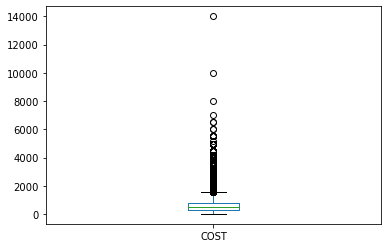

In [83]:
ds["COST"].plot.box()

<AxesSubplot:>

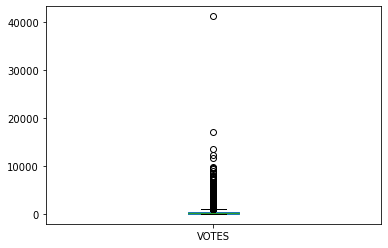

In [84]:
ds["VOTES"].plot.box()

In [85]:
x=ds.drop(columns=['COST'])

In [86]:
y=pd.DataFrame(ds['COST'])

In [87]:
x.shape,  y.shape

((12690, 15), (12690, 1))

In [88]:
ds.skew()

RESTAURANT_ID     0.006947
CITY              0.299941
LOCALITY          0.340318
RATING           -2.214271
VOTES            14.522617
COST              3.978801
TITLE1            0.087325
TITLE2           -3.057865
CUISINE1          0.026008
CUISINE2          0.055174
CUISINE3         -0.823537
CUISINE4         -2.108741
CUISINE5         -4.094366
CUISINE6         -6.854150
CUISINE7        -10.250522
CUISINE8        -13.749110
dtype: float64

 skewness is there so we will remove it

In [89]:
from sklearn.preprocessing import power_transform

In [90]:
x=power_transform(x,method='yeo-johnson')

#scaling the dataset

In [91]:
#scaling the dataset
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_t=sc.fit_transform(x)
x_t.shape

(12690, 15)

In [92]:
# importing our model libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [93]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.22,random_state=42)

In [95]:
x_train.shape

(9898, 15)

In [96]:
x_test.shape

(2792, 15)

In [97]:
y_train.shape

(9898, 1)

In [98]:
y_test.shape

(2792, 1)

# Finding the best model


In [99]:
#using algorithms in for loops
model=[DecisionTreeRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),BaggingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print("Score of " , m , "is" , m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print("Mean Absolute error  " , mean_absolute_error(y_test,y_pred))
    print("Mean Squared error \n",mean_squared_error(y_test,y_pred))
    print("Root mean Squared error is \n",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("r2 score " , r2_score(y_test,y_pred))
    print("**********************************************************************\n")

Score of  DecisionTreeRegressor() is 1.0
Mean Absolute error   256.31590257879657
Mean Squared error 
 203118.25573065903
Root mean Squared error is 
 450.6864272758378
r2 score  0.4323336790360276
**********************************************************************

Score of  GradientBoostingRegressor() is 0.718523591136182
Mean Absolute error   193.16375917194313
Mean Squared error 
 100060.64635119478
Root mean Squared error is 
 316.32364178352964
r2 score  0.7203547323546349
**********************************************************************

Score of  RandomForestRegressor() is 0.9579788855799336
Mean Absolute error   186.00037607449858
Mean Squared error 
 101083.93058313036
Root mean Squared error is 
 317.9369915299734
r2 score  0.7174949008089486
**********************************************************************

Score of  BaggingRegressor() is 0.9404739458438907
Mean Absolute error   194.1651504297994
Mean Squared error 
 111331.87501074497
Root mean Squared error i

As DecisionTreeRegressor is giving 100% score. But very low  r2score. I will continue with RandomForestRegressor with .99 score

# hyperparameter tuning

In [100]:
# randomForestRegressor is best performing model so finding its best parameter
from sklearn.model_selection import GridSearchCV

In [101]:
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap':[True],'criterion':['mse'] , 
              'max_features':['auto'],  'bootstrap': [True], 'max_depth': [58, 60, None], 'n_estimators': [10, 11, 12, 13, 15,20,25,29,30],'random_state':[42,0]}

In [102]:
rfr = RandomForestRegressor()
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)

In [103]:
g_search.fit(x_train, y_train);
print(g_search.best_params_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 58, 'max_features': 'auto', 'n_estimators': 29, 'random_state': 0}


In [104]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=58,
                           max_features='auto', n_estimators= 29, random_state=42)
rf = rf.fit(x_train, y_train)
print(" Score is ",rf.score(x_train,y_train))
predrf = rf.predict(x_test)
print("Mean Absolute error  " , mean_absolute_error(y_test,predrf))
print("Mean Squared error \n",mean_squared_error(y_test,predrf))
print("Root mean Squared error is \n",np.sqrt(mean_squared_error(y_test,predrf)))
print("r2 score " , r2_score(y_test,predrf))
print("**********************************************************************\n")

 Score is  0.954607657325165
Mean Absolute error   187.57903122221126
Mean Squared error 
 102854.45421307352
Root mean Squared error is 
 320.70929860712414
r2 score  0.7125467161587102
**********************************************************************



# Saving the model- Serialization

In [105]:
# saving the prediction model

import pickle
filename="FoodCost.pkl"
pickle.dump(rf,open(filename,'wb'))

In [106]:
# load the model
fitted_model=pickle.load(open("FoodCost.pkl",'rb'))

In [107]:
fitted_model

RandomForestRegressor(max_depth=58, n_estimators=29, random_state=42)

In [108]:
# predictions over test data (foodcost_test.csv)
predictions=fitted_model.predict(scaled_df)

In [109]:
predictions=predictions.astype(int)

In [112]:
ds_pred=pd.DataFrame(data=predictions,columns=['COST'])
writer = pd.ExcelWriter('DoctorFee.xlsx', engine='xlsxwriter')
ds_pred.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

In [113]:
ds_pred

,COST
0,284
1,1198
2,248
3,718
4,1112
...,...
4226,343
4227,665
4228,1120
4229,901
